## Trefethen 9.3

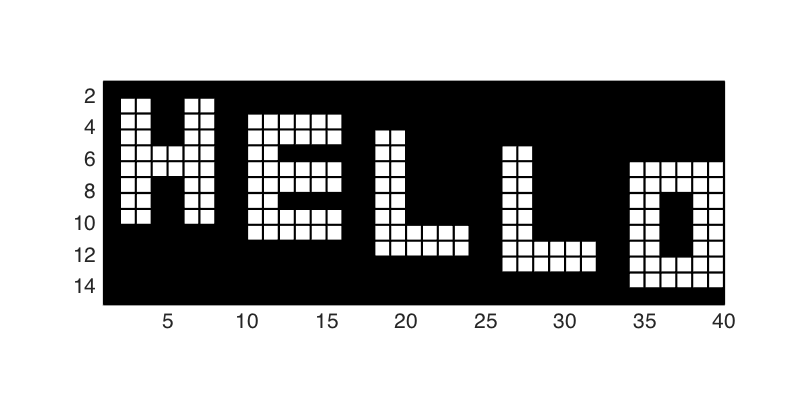

In [14]:
%plot --size '800,400'
A_1 = zeros(15,40);

% H
A_1(2:9,2:3) = 1;
A_1(5:6,4:5) = 1;
A_1(2:9,6:7) = 1;

% E
A_1(3:10,10:11) = 1;
A_1(3:10,12:15) = [1,1,1,1;1,1,1,1;
                 0,0,0,0;1,1,1,1;
                 1,1,1,1;0,0,0,0;
                 1,1,1,1;1,1,1,1];

% L
A_1(4:11,18:19) = 1;
A_1(10:11,20:23) = 1;

% L
A_1(5:12,26:27) = 1;
A_1(11:12,28:31) = 1;

% O
A_1(6:13,34:35) = 1;
A_1(6:13,36:37) = [1,1;1,1;0,0;
                 0,0;0,0;0,0;1,1;1,1];
A_1(6:13,38:39) = 1;

colormap(gray)
pcolor(A_1)
axis equal tight ij

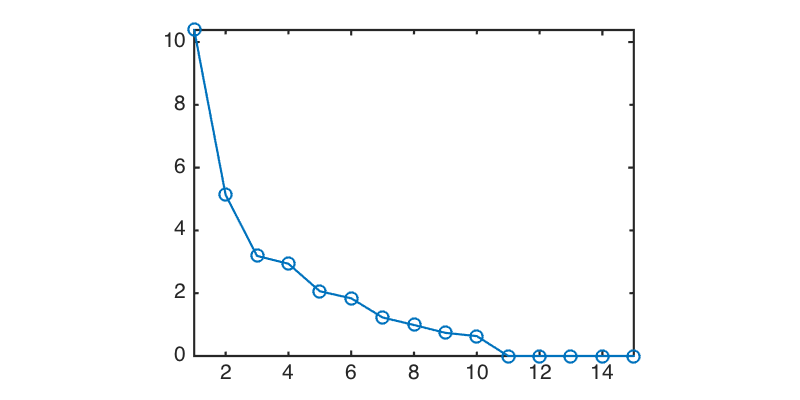

In [15]:
[U,S,V] = svd(A_1);
plot(diag(S),'-o') % show singular values
axis equal tight

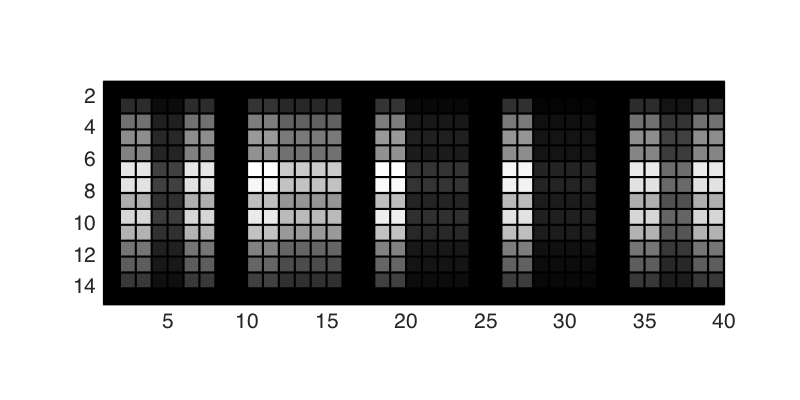

In [16]:
v = 1;
B = U(:,1:v) * S(1:v,:) * V'; % approximation with v=1
pcolor(B)
colormap(gray)
axis equal tight ij

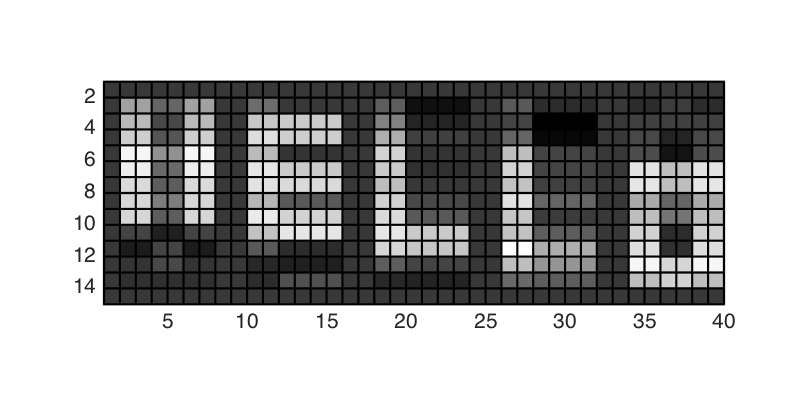

In [17]:
v = 4;
B = U(:,1:v) * S(1:v,:) * V'; % approximation with v=4
pcolor(B)
colormap(gray)
axis equal tight ij

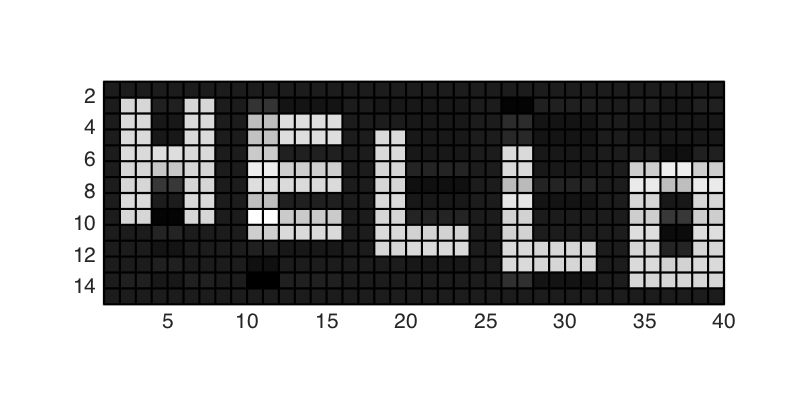

In [18]:
v = 8;
B = U(:,1:v) * S(1:v,:) * V'; % approximation with v=8
pcolor(B)
colormap(gray);
axis equal tight ij

## Trefethen 11.3

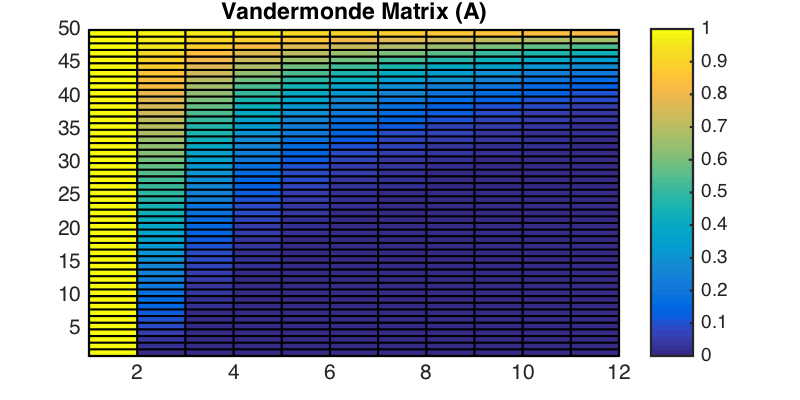

In [19]:
m = 50;
n= 12;
t = linspace(0,1,m);

A = fliplr(vander(t));
A = A(:,1:n);

b = cos(4*t)';

pcolor(A);
title('Vandermonde Matrix (A)');
colorbar();

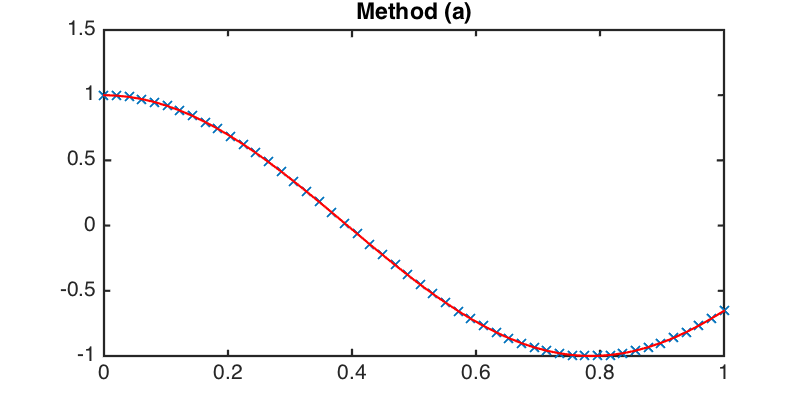

In [20]:
% (a)
x_star_a = (A'*A) \ (A' * b); % \ operator uses cholesky factorization since (A^* A) is symmetric
figure()
plot(t,b,'x')
hold on
plot(t,A*x_star_a,'r')
title('Method (a)')

#### Modified Gram-Schmidt algorithm :

```octave
function [Q,R] = mgs(A)    
    [m,n] = size(A);    
    Q = zeros(m,n); % reduced QR factorization
    R = zeros(n,n);
    V = A;
    for i=1:n
        R(i,i) = norm(V(:,i));
        Q(:,i) = V(:,i) / R(i,i);
        for j=i+1:n
           R(i,j) = Q(:,i)' * V(:,j);
           V(:,j) = V(:,j) - R(i,j) * Q(:,i);
        end    
    end  
end
```

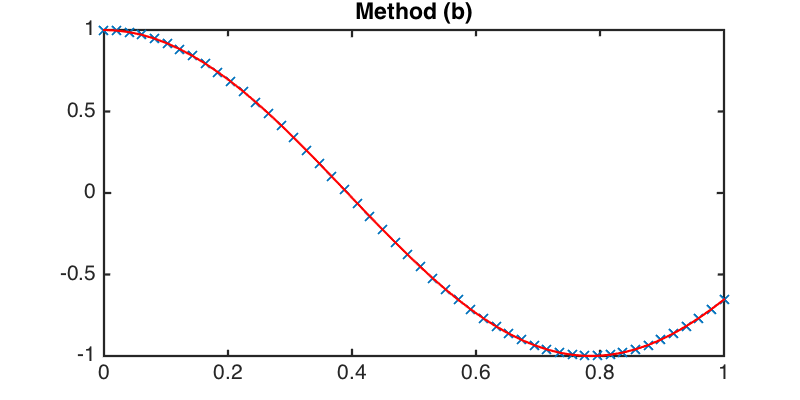

In [21]:
% (b)
[Q,R] = mgs(A);
x_star_b = R\(Q'*b);
plot(t,b,'x')
hold on
plot(t,A*x_star_b,'r')
title('Method (b)')

#### Householder Triangularization :

```octave
function [Q,R] = householder(A)
    [m,n] = size(A);
    Q = eye(m);     
    R = A;
    for k=1:n        
        level = m-k+1; % size
        
        e_1 = zeros(level,1);
        e_1(1) = 1;
        
        x = R(k:m,k);
        v_k = sign(x(1))*norm(x)*e_1 + x;
        v_k = v_k / norm(v_k);
        F = eye(level) - 2 * (v_k * v_k');
        Q_k = eye(m,m);
        Q_k(k:end,k:end) = F;
        
        R = Q_k * R;
        Q = Q * Q_k';                
    end 
end
```

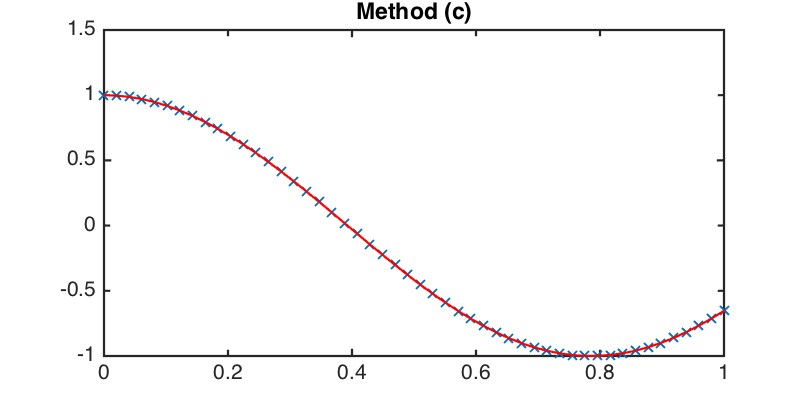

In [22]:
% (c)
[Q,R] = householder(A);
x_star_c = R\(Q'*b);
plot(t,b,'x')
hold on
plot(t,A*x_star_c,'r')
title('Method (c)')

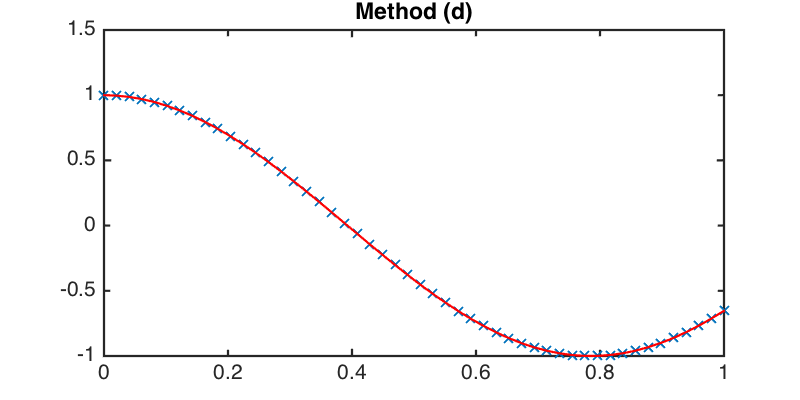

In [23]:
% (d)
[Q,R] = qr(A);
x_star_d = R\(Q'*b);
plot(t,b,'x')
hold on
plot(t,A*x_star_d,'r')
title('Method (d)')

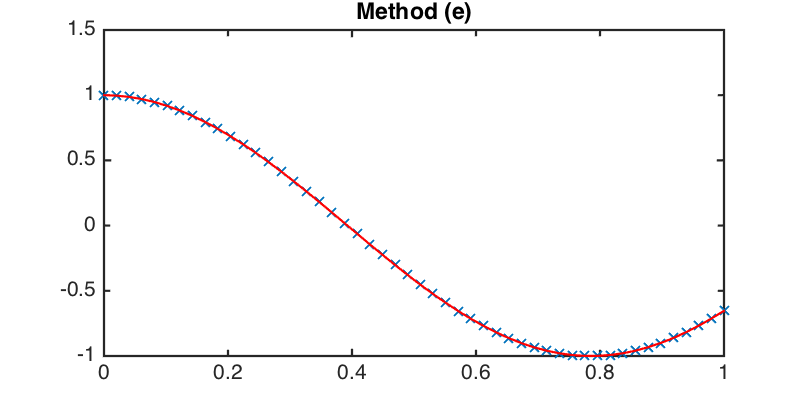

In [24]:
% (e)
x_star_e = A\b;
plot(t,b,'x')
hold on
plot(t,A*x_star_e,'r')
title('Method (e)')

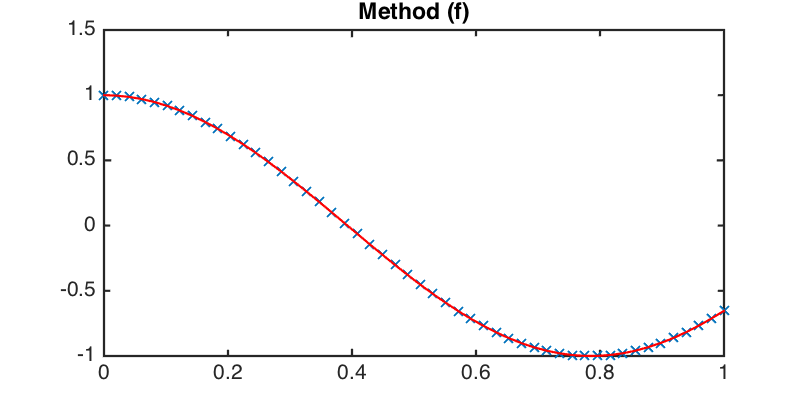

In [25]:
% (f)
[U_1,S_1,V_1] = svd(A);
w = S_1\(U_1'*b);
x_star_f = V_1*w;
plot(t,b,'x')
hold on
plot(t,A*x_star_f,'r-')
title('Method (f)')

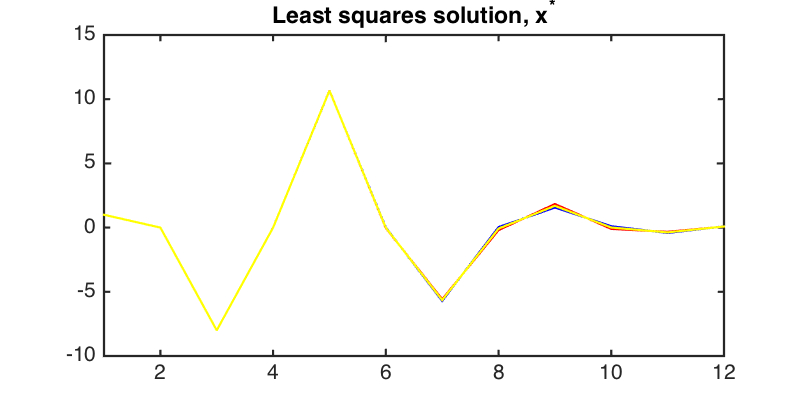

In [26]:
plot(x_star_a,'r')
hold on
plot(x_star_b,'b')
plot(x_star_c,'g')
plot(x_star_d,'m')
plot(x_star_e,'c')
plot(x_star_f,'y')
xlim([1 12])
title('Least squares solution, x^*')

#### (g)
Each curve with different color represent a $x^*$ solution with a different method. Notice that, yellow *(method f)*, red *(method a)*, blue *(method b)* lines deviate from each other slightly on indexes 8, 9, 10.

## Trefethen 10.4

#### (a)
Matrix $J$ rotates it's input vector clockwise. If we examine the eigenvector associated with the eigenvalue, $\lambda = 1$, we can tell which subspace it reflects with respect to. The calculated eigenvector is, $v = (s, c+1)^*$ and the orthogonal subspace is spanned by $z = (c+1,-s)^*$. In order to verify, one can form the householder reflector, $I-2P = I-2\frac{zz^*}{z^*z}$ which must equal $F$. Also note that, $F = J \begin{pmatrix} -1 & 0\\0 & 1\end{pmatrix}$. Meaning, transformation $F$ is equivalent of reflecting a vector with respect to x-axis and rotating it $\theta$ degrees clockwise.

#### (b)

<img src="http://s18.postimg.org/jauma5wjd/Screenshot_2016_03_12_11_06_46.png" width="800">